# **Sentimental Analysis: Unveiling Macbook Amazon Consumer Reviews Through NLP**

In [ ]:
!pip install kaggle

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving kaggle.json to kaggle.json


Importing the dataset from kaggle to google collab

In [ ]:
!mkdir -p ~/.kaggle
!mv kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle datasets download -d poojaparab/amazon-product-review-dataset-apple-mac-air

Dataset URL: https://www.kaggle.com/datasets/poojaparab/amazon-product-review-dataset-apple-mac-air
License(s): unknown
  0% 0.00/223k [00:00<?, ?B/s]
100% 223k/223k [00:00<00:00, 24.8MB/s]


Importing all necessary libraries

In [ ]:
pip install requests

In [ ]:
! pip install clean-text

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 175.4/175.4 kB 5.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.4/54.4 kB 8.3 MB/s eta 0:00:00
  Created wheel for emoji: filename=emoji-1.7.0-py3-none-any.whl size=171034 sha256=b1dd8ee1118a8a91d7ca8a72507ba120ae03b1c2fa0fa09821429f5134ee7974
  Stored in directory: /root/.cache/pip/wheels/31/8a/8c/315c9e5d7773f74b33d5ed33f075b49c6eaeb7cedbb86e2cf8
Successfully built emoji


In [ ]:
!pip install transformers

#**DATA COLLECTION**

In [ ]:
import pandas as pd
import re
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
import cleantext
import string
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras
assert tf.__version__ >= "2.0"
from transformers import BertTokenizer, TFBertModel,TFBertForSequenceClassification
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from wordcloud import WordCloud
import seaborn as sns

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
from google.colab import drive


In [ ]:
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!unzip /content/amazon-product-review-dataset-apple-mac-air.zip -d /content/drive/MyDrive/NLP

Archive:  /content/amazon-product-review-dataset-apple-mac-air.zip
  inflating: /content/drive/MyDrive/NLP/product_review.csv  


Converting the given dataset into df using pandas

In [ ]:
csv_file_path = '/content/drive/MyDrive/NLP/product_review.csv'
df = pd.read_csv(csv_file_path)

In [ ]:
df.head()

,product,title,date,rating,body
0,Amazon.com: Customer reviews: Apple 2020 MacBo...,"Great battery life, great performance!","Reviewed in the United States on December 6, 2022",5.0,UPDATE 3/8/2023: i bought parallels desktop an...
1,Amazon.com: Customer reviews: Apple 2020 MacBo...,"Very lightweight, good speed, but NOT gold at all","Reviewed in the United States on December 6, 2022",4.0,Updated review with more detail [after 2 weeks...
2,Amazon.com: Customer reviews: Apple 2020 MacBo...,Great notebook with almost no weaknesses,"Reviewed in the United States on December 6, 2022",5.0,Why is it that the PC world cannot make a good...
3,Amazon.com: Customer reviews: Apple 2020 MacBo...,The best device for work and travel,"Reviewed in the United States on December 6, 2022",5.0,"As a programmer, I can say that this is just t..."
4,Amazon.com: Customer reviews: Apple 2020 MacBo...,Finally able to move to a mac,"Reviewed in the United States on December 6, 2022",5.0,I have tried for years to move to a mac given ...


In [ ]:
#checking the macbook product that is present in products column
df['product']

0       Amazon.com: Customer reviews: Apple 2020 MacBo...
1       Amazon.com: Customer reviews: Apple 2020 MacBo...
2       Amazon.com: Customer reviews: Apple 2020 MacBo...
3       Amazon.com: Customer reviews: Apple 2020 MacBo...
4       Amazon.com: Customer reviews: Apple 2020 MacBo...
                              ...                        
1695    Amazon.com: Customer reviews: Apple 2020 MacBo...
1696    Amazon.com: Customer reviews: Apple 2020 MacBo...
1697    Amazon.com: Customer reviews: Apple 2020 MacBo...
1698    Amazon.com: Customer reviews: Apple 2020 MacBo...
1699    Amazon.com: Customer reviews: Apple 2020 MacBo...
Name: product, Length: 1700, dtype: object

In [ ]:
# Removing unnecessary information from the "product" column
df['product'] = df['product'].str.replace('Amazon.com: Customer reviews: ', '')

In [ ]:
df['product']

0       Apple 2020 MacBook Air Laptop M1 Chip, 13&#34;...
1       Apple 2020 MacBook Air Laptop M1 Chip, 13&#34;...
2       Apple 2020 MacBook Air Laptop M1 Chip, 13&#34;...
3       Apple 2020 MacBook Air Laptop M1 Chip, 13&#34;...
4       Apple 2020 MacBook Air Laptop M1 Chip, 13&#34;...
                              ...                        
1695    Apple 2020 MacBook Air Laptop M1 Chip, 13&#34;...
1696    Apple 2020 MacBook Air Laptop M1 Chip, 13&#34;...
1697    Apple 2020 MacBook Air Laptop M1 Chip, 13&#34;...
1698    Apple 2020 MacBook Air Laptop M1 Chip, 13&#34;...
1699    Apple 2020 MacBook Air Laptop M1 Chip, 13&#34;...
Name: product, Length: 1700, dtype: object

Changing the date type into yy-dd-mm

In [ ]:
from datetime import datetime
def return_dt(ex_string):
  date = datetime.strptime(ex_string.split("on ")[1], "%B %d, %Y").date()
  return date
df['date'] = df['date'].apply(return_dt)

In [ ]:
df['date']=pd.to_datetime(df['date'])

In [ ]:
df['date']

0      2022-12-06
1      2022-12-06
2      2022-12-06
3      2022-12-06
4      2022-12-06
          ...    
1695   2021-09-10
1696   2021-09-10
1697   2021-09-10
1698   2021-09-10
1699   2021-09-10
Name: date, Length: 1700, dtype: datetime64[ns]

In [ ]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...


True

#**DATA PREPROCESSING**

In [ ]:
import re
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer, PorterStemmer

# Converting the 'body' column to strings
df['body'] = df['body'].astype(str)

# Removing special characters and punctuation (excluding %)
df['clean_text'] = df['body'].apply(lambda x: re.sub(r'[^a-zA-Z\s%]', '', x))

# Lowercasing
df['clean_text'] = df['body'].str.lower()

# Converting non-string-like objects to strings
df['clean_text'] = df['body'].astype(str)

# Tokenization
df['tokens'] = df['body'].apply(word_tokenize)

# Lemmatization(tried stemming but lemmatization results was more better)
lemmatizer = WordNetLemmatizer()
df['lemmatized_tokens'] = df['tokens'].apply(lambda x: [lemmatizer.lemmatize(word) for word in x])


In [ ]:
df

,product,title,date,rating,body,clean_text,tokens,lemmatized_tokens
0,"Apple 2020 MacBook Air Laptop M1 Chip, 13&#34;...","Great battery life, great performance!",2022-12-06,5.0,UPDATE 3/8/2023: i bought parallels desktop an...,UPDATE i bought parallels desktop and a windo...,"[UPDATE, 3/8/2023, :, i, bought, parallels, de...","[UPDATE, 3/8/2023, :, i, bought, parallel, des..."
1,"Apple 2020 MacBook Air Laptop M1 Chip, 13&#34;...","Very lightweight, good speed, but NOT gold at all",2022-12-06,4.0,Updated review with more detail [after 2 weeks...,Updated review with more detail after weeks ...,"[Updated, review, with, more, detail, [, after...","[Updated, review, with, more, detail, [, after..."
2,"Apple 2020 MacBook Air Laptop M1 Chip, 13&#34;...",Great notebook with almost no weaknesses,2022-12-06,5.0,Why is it that the PC world cannot make a good...,Why is it that the PC world cannot make a good...,"[Why, is, it, that, the, PC, world, can, not, ...","[Why, is, it, that, the, PC, world, can, not, ..."
3,"Apple 2020 MacBook Air Laptop M1 Chip, 13&#34;...",The best device for work and travel,2022-12-06,5.0,"As a programmer, I can say that this is just t...",As a programmer I can say that this is just th...,"[As, a, programmer, ,, I, can, say, that, this...","[As, a, programmer, ,, I, can, say, that, this..."
4,"Apple 2020 MacBook Air Laptop M1 Chip, 13&#34;...",Finally able to move to a mac,2022-12-06,5.0,I have tried for years to move to a mac given ...,I have tried for years to move to a mac given ...,"[I, have, tried, for, years, to, move, to, a, ...","[I, have, tried, for, year, to, move, to, a, m..."
...,...,...,...,...,...,...,...,...
1695,"Apple 2020 MacBook Air Laptop M1 Chip, 13&#34;...","Grandma wants, grandma gets",2021-09-10,5.0,My grandmother’s birthday falls on Christmas D...,My grandmothers birthday falls on Christmas Da...,"[My, grandmother, ’, s, birthday, falls, on, C...","[My, grandmother, ’, s, birthday, fall, on, Ch..."
1696,"Apple 2020 MacBook Air Laptop M1 Chip, 13&#34;...",Amazing,2021-09-10,5.0,"Works great, no issues",Works great no issues,"[Works, great, ,, no, issues]","[Works, great, ,, no, issue]"
1697,"Apple 2020 MacBook Air Laptop M1 Chip, 13&#34;...",Loved it,2021-09-10,5.0,Just simply loving it.,Just simply loving it,"[Just, simply, loving, it, .]","[Just, simply, loving, it, .]"
1698,"Apple 2020 MacBook Air Laptop M1 Chip, 13&#34;...",The most beautiful Mac book ever,2021-09-10,5.0,The Mac book air M1 is powerful. The color is ...,The Mac book air M is powerful The color is st...,"[The, Mac, book, air, M1, is, powerful, ., The...","[The, Mac, book, air, M1, is, powerful, ., The..."


#**EXPLORATORY DATA ANALYSIS**

Rating over the Years

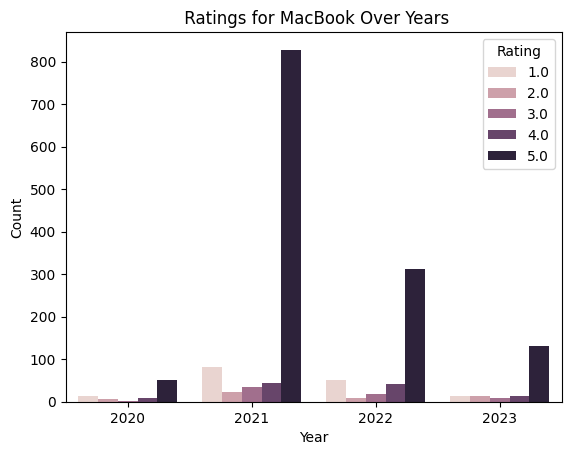

In [ ]:
import seaborn as sns
# Set the palette
palette = "Paired"  # Example palette
# Countplot
sns.set_palette(palette)
sns.countplot(data=df, x=df["date"].dt.year, hue="rating")
plt.xlabel('Year')
plt.ylabel('Count')
plt.title(' Ratings for MacBook Over Years')
plt.legend(title='Rating')
plt.show()

Most Commonly used words in Positive Reviews of Titles

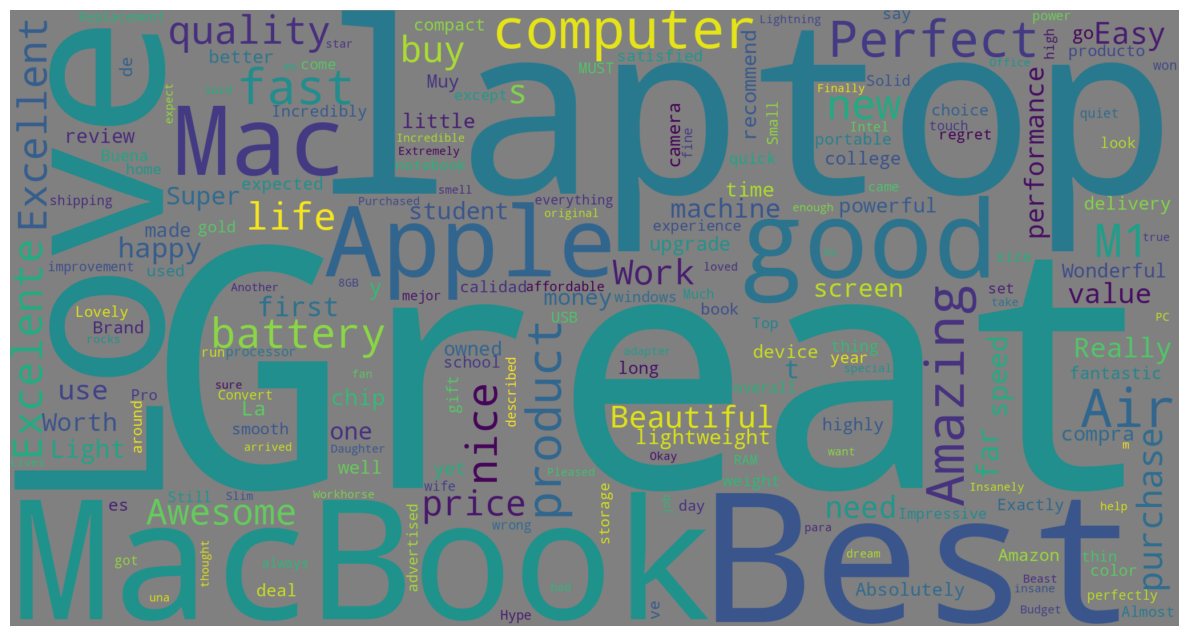

In [ ]:
from wordcloud import WordCloud
# Filtering titles based on rating and convert to strings
filtered_titles = df[df.rating > 3.5]['title'].astype(str)

# Removing NaN values
filtered_titles = filtered_titles.dropna()

# Generating word cloud
word_cloud = WordCloud(collocations=False, background_color='grey', width=2048, height=1080).generate(' '.join(filtered_titles))
plt.figure(figsize=(16, 8))
plt.imshow(word_cloud, interpolation='bilinear')
plt.axis('off')
plt.show()

Most Commonly used words in Negative Reviews Titles

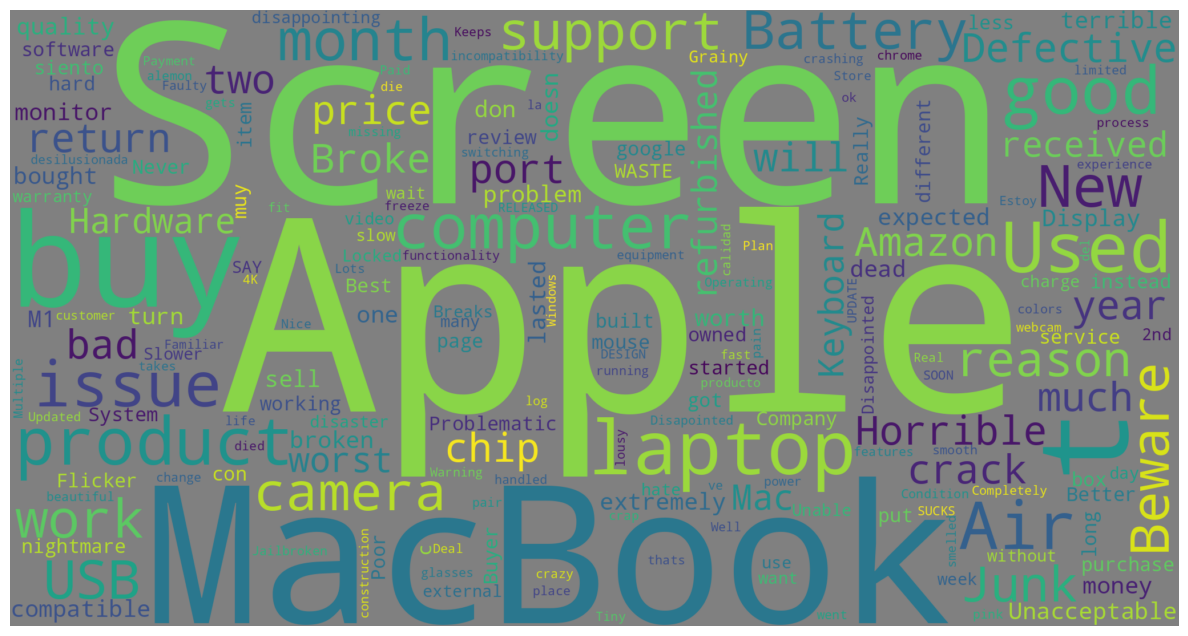

In [ ]:
from wordcloud import WordCloud

# Filtering titles based on rating and convert to strings
filtered_titles = df[df.rating <3]['title'].astype(str)

# Removing NaN values
filtered_titles = filtered_titles.dropna()

# Generating word cloud
word_cloud = WordCloud(collocations=False, background_color='grey', width=2048, height=1080).generate(' '.join(filtered_titles))
plt.figure(figsize=(16, 8))
plt.imshow(word_cloud, interpolation='bilinear')
plt.axis('off')
plt.show()

Determining counts for each rating

In [ ]:
print(df['rating'].value_counts())

rating
5.0    1321
1.0     160
4.0     105
3.0      63
2.0      51
Name: count, dtype: int64


Creating labels to perform sentiment analysis

In [ ]:
# Applying the sentiment label based on the rating
df['sentiment'] = df['rating'].apply(lambda x: 'positive' if x > 3 else ('neutral' if x == 3 else 'negative'))

# Mapping sentiments to numerical values for the BERT model
sentiment_label = {'positive': 2, 'neutral': 1, 'negative': 0}
df['label'] = df['sentiment'].map(sentiment_label)

# Printing the distribution of sentiments
print("Sentiment distribution:\n", df['sentiment'].value_counts())

Sentiment distribution:
 sentiment
positive    1426
negative     211
neutral       63
Name: count, dtype: int64


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer

# Initialize the TF-IDF vectorizer
vectorizer = TfidfVectorizer(max_features=5000, ngram_range=(1, 2))

# Preprocess the text data
X = vectorizer.fit_transform(df['clean_text'])
y = df['label']

# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)


#**LOGISTIC REGRESION**

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

# Initialize and train the Logistic Regression model
logistic_model = LogisticRegression(max_iter=1000)
logistic_model.fit(X_train, y_train)

# Make predictions on the validation set
y_pred_logistic = logistic_model.predict(X_val)

# Print the classification report
print("Logistic Regression Classification Report")
print(classification_report(y_val, y_pred_logistic, target_names=['negative', 'neutral', 'positive']))


Logistic Regression Classification Report
              precision    recall  f1-score   support

    negative       0.90      0.19      0.32        47
     neutral       0.00      0.00      0.00         9
    positive       0.86      1.00      0.92       284

    accuracy                           0.86       340
   macro avg       0.59      0.40      0.41       340
weighted avg       0.84      0.86      0.81       340



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


#**NAIVE BAYE'S**

In [ ]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report

# Initialize and train the Naive Bayes model
nb_model = MultinomialNB()
nb_model.fit(X_train, y_train)

# Make predictions on the validation set
y_pred_nb = nb_model.predict(X_val)

# Print the classification report
print("Naive Bayes Classification Report")
print(classification_report(y_val, y_pred_nb, target_names=['negative', 'neutral', 'positive']))


Naive Bayes Classification Report
              precision    recall  f1-score   support

    negative       0.00      0.00      0.00        47
     neutral       0.00      0.00      0.00         9
    positive       0.84      1.00      0.91       284

    accuracy                           0.84       340
   macro avg       0.28      0.33      0.30       340
weighted avg       0.70      0.84      0.76       340



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


#**SVM**

In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report

# Initialize and train the SVM model
svm_model = SVC(kernel='linear')
svm_model.fit(X_train, y_train)

# Make predictions on the validation set
y_pred_svm = svm_model.predict(X_val)

# Print the classification report
print("SVM Classification Report")
print(classification_report(y_val, y_pred_svm, target_names=['negative', 'neutral', 'positive']))


SVM Classification Report
              precision    recall  f1-score   support

    negative       0.90      0.40      0.56        47
     neutral       0.00      0.00      0.00         9
    positive       0.88      0.99      0.94       284

    accuracy                           0.89       340
   macro avg       0.60      0.47      0.50       340
weighted avg       0.86      0.89      0.86       340



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


#**SENTIMENT ANLAYSIS USING BERT**

In [ ]:
from transformers import BertTokenizer

# Loading pre-trained BERT tokenizer
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

# Tokenizing the text
def tokenize_data(text, max_length=256):
    return tokenizer(
        text,
        padding='max_length',
        truncation=True,
        max_length=max_length,
        return_tensors='pt'
    )

# Tokenizing the review texts
tokenized_reviews = df['clean_text'].apply(lambda x: tokenize_data(x))

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

In [ ]:
import torch
from torch.utils.data import Dataset, DataLoader

class ReviewsDataset(Dataset):
    def __init__(self, tokenized_reviews, labels):
        self.input_ids = torch.cat([x['input_ids'] for x in tokenized_reviews])
        self.attention_mask = torch.cat([x['attention_mask'] for x in tokenized_reviews])
        self.labels = torch.tensor(labels)

    def __len__(self):
        return len(self.labels)

    def __getitem__(self, idx):
        return {
            'input_ids': self.input_ids[idx],
            'attention_mask': self.attention_mask[idx],
            'labels': self.labels[idx]
        }

# Creating the dataset
dataset = ReviewsDataset(tokenized_reviews, df['label'].tolist())

# Splitting dataset into training and validation sets
from sklearn.model_selection import train_test_split

train_size = 0.8
train_dataset, val_dataset = train_test_split(dataset, train_size=train_size, random_state=42)

# Creating DataLoader
train_dataloader = DataLoader(train_dataset, batch_size=16, shuffle=True)
val_dataloader = DataLoader(val_dataset, batch_size=16, shuffle=False)


In [ ]:
import torch
from transformers import BertForSequenceClassification, AdamW, get_linear_schedule_with_warmup
from sklearn.metrics import accuracy_score

# Loading pre-trained BERT model
model = BertForSequenceClassification.from_pretrained('bert-base-uncased', num_labels=3)

# Setting up optimizer and scheduler
optimizer = AdamW(model.parameters(), lr=2e-5, eps=1e-8)
total_steps = len(train_dataloader) * 4  # Assuming 4 epochs
scheduler = get_linear_schedule_with_warmup(optimizer, num_warmup_steps=0, num_training_steps=total_steps)

# Training loop
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model.to(device)

epochs = 4
for epoch in range(epochs):
    model.train()
    total_loss = 0
    correct_predictions = 0
    total_predictions = 0

    for batch in train_dataloader:
        batch = {key: val.to(device) for key, val in batch.items()}
        outputs = model(**batch)
        loss = outputs.loss
        total_loss += loss.item()

        logits = outputs.logits
        preds = torch.argmax(logits, dim=1).flatten()
        labels = batch['labels']

        correct_predictions += (preds == labels).sum().item()
        total_predictions += labels.size(0)

        loss.backward()
        optimizer.step()
        scheduler.step()
        optimizer.zero_grad()

    avg_loss = total_loss / len(train_dataloader)
    accuracy = correct_predictions / total_predictions
    print(f"Epoch {epoch + 1}, Training Loss: {avg_loss}, Training Accuracy: {accuracy}")

model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/usr/local/lib/python3.10/dist-packages/transformers/optimization.py:521: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


Epoch 1, Training Loss: 0.45737205770085837, Training Accuracy: 0.8558823529411764
Epoch 2, Training Loss: 0.25575342101647575, Training Accuracy: 0.9154411764705882
Epoch 3, Training Loss: 0.15951934929060585, Training Accuracy: 0.9477941176470588
Epoch 4, Training Loss: 0.11726449055268484, Training Accuracy: 0.9588235294117647


SAVING THE MODEL TO MY LOCAL PATH

In [ ]:
model.save_pretrained('/content/drive/MyDrive/NLP')
tokenizer.save_pretrained('/content/drive/MyDrive/NLP')

('/content/drive/MyDrive/NLP/tokenizer_config.json',
 '/content/drive/MyDrive/NLP/special_tokens_map.json',
 '/content/drive/MyDrive/NLP/vocab.txt',
 '/content/drive/MyDrive/NLP/added_tokens.json')

#**EVALUATION METRICS (CLASSIFICATION REPORT) FOR BERT MODEL**

In [ ]:
from sklearn.metrics import classification_report

model.eval()
all_preds = []
all_labels = []

for batch in val_dataloader:
    batch = {key: val.to(device) for key, val in batch.items()}
    with torch.no_grad():
        outputs = model(**batch)

    logits = outputs.logits
    preds = torch.argmax(logits, dim=1).flatten()

    all_preds.extend(preds.cpu().numpy())
    all_labels.extend(batch['labels'].cpu().numpy())

# Print the classification report
print(classification_report(all_labels, all_preds, target_names=['negative', 'neutral', 'positive']))


              precision    recall  f1-score   support

    negative       0.82      0.66      0.73        47
     neutral       0.00      0.00      0.00         9
    positive       0.93      0.98      0.95       284

    accuracy                           0.91       340
   macro avg       0.58      0.54      0.56       340
weighted avg       0.89      0.91      0.89       340



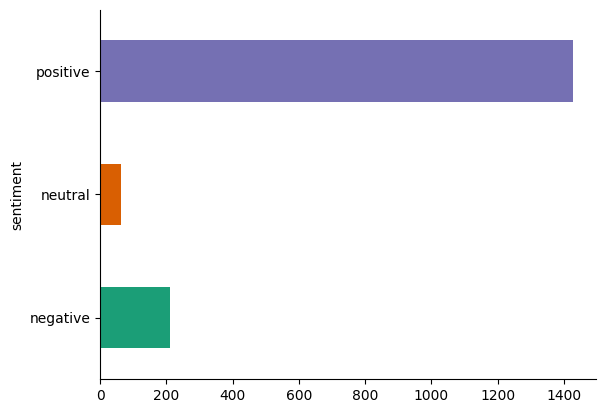

In [ ]:
from matplotlib import pyplot as plt
import seaborn as sns
df.groupby('sentiment').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

# **CONFUSION MATRIX**

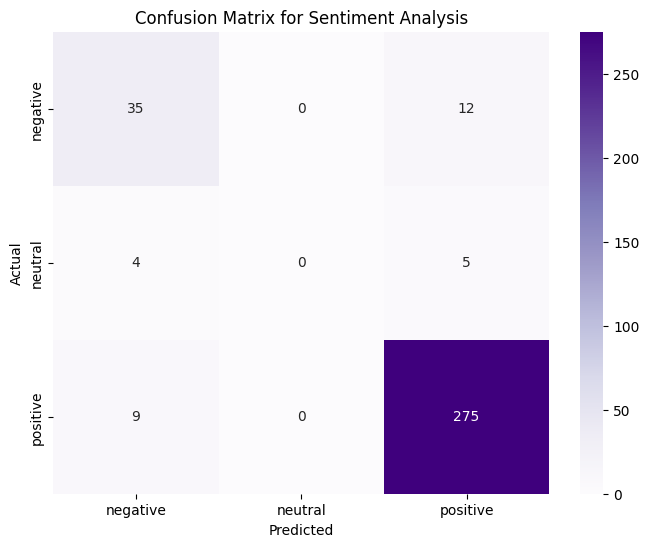

In [ ]:
from sklearn.metrics import confusion_matrix

# Calculate the confusion matrix
cm = confusion_matrix(all_labels, all_preds)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Purples', xticklabels=['negative', 'neutral', 'positive'], yticklabels=['negative', 'neutral', 'positive'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Sentiment Analysis')
plt.show()

True Positive (Positive class correctly predicted): The model correctly predicted 275 reviews as positive.

True Neutral (Neutral class correctly predicted): The model did not correctly predict any reviews as neutral.

True Negative (Negative class correctly predicted): The model correctly predicted 35 reviews as negative.

False Positive (Negative reviews predicted as positive): 12 negative reviews were incorrectly predicted as positive.

False Neutral (Neutral reviews predicted as positive): 5 neutral reviews were incorrectly predicted as positive.

False Negative (Positive reviews predicted as negative): 9 positive reviews were incorrectly predicted as negative.

False Neutral (Neutral reviews predicted as negative): 4 neutral reviews were incorrectly predicted as negative.

#**TOPIC MODELLING**

In [ ]:
from nltk.corpus import stopwords
# Function to clean title
def clean_title(text):
    # Check if the text is NaN
    if isinstance(text, str):
        # Convert text to lowercase
        text = text.lower()
        # Remove punctuation and special characters using regex
        text = re.sub(r'[^a-zA-Z\s]', '', text)
        # Tokenize the text
        tokens = word_tokenize(text)
        # Remove stopwords
        stop_words = set(stopwords.words('english'))
        tokens = [word for word in tokens if word not in stop_words]
        # Join tokens back into a string
        clean_text = ' '.join(tokens)
        return clean_text
    else:
        return ''

# Applying text cleaning to the 'title' column
df['title_after_cleaning'] = df['title'].apply(clean_title)

# Convert cleaned titles back to a list
cleaned_titles = df['title_after_cleaning'].tolist()

# Vectorizing the cleaned text data
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(cleaned_titles)

# Initializing LDA model
lda = LatentDirichletAllocation(n_components=10, random_state=42)

# Fitting LDA model to the cleaned text vectors
lda.fit(X)

#the top words for each topic
def display_topics(model, feature_names, n_top_words):
    for topic_idx, topic in enumerate(model.components_):
        print(f"Topic {topic_idx + 1}:")
        print(" ".join([feature_names[i] for i in topic.argsort()[:-n_top_words - 1:-1]]))
        print()

# Print the top words for each topic
print("Top words for each topic:")
display_topics(lda, vectorizer.get_feature_names_out(), 15)


Top words for each topic:
Topic 1:
perfect screen happy camera dont work bad buy quality extremely lovely slow convert touch quick

Topic 2:
laptop macbook air nice great new best really brand used fantastic buy yet solid exactly

Topic 3:
best excelente ever laptop ive owned compra say expected producto computer buena size advertised muy

Topic 4:
amazing price like get need mac work apple support upgrade doesnt really performance smooth processor

Topic 5:
mac computer great first work book device needs one junk student received battery months ram

Topic 6:
fast battery life awesome light performance wonderful apple lightweight incredibly weight speed thin chip quiet

Topic 7:
great works buy powerful usb long deal compact gift hardware issues perfectly little well upgrade

Topic 8:
good excellent easy far use worth chip recommend quality machine apple new la hype highly

Topic 9:
apple product great quality beautiful buy super speed college satisfied students cant color top impressi

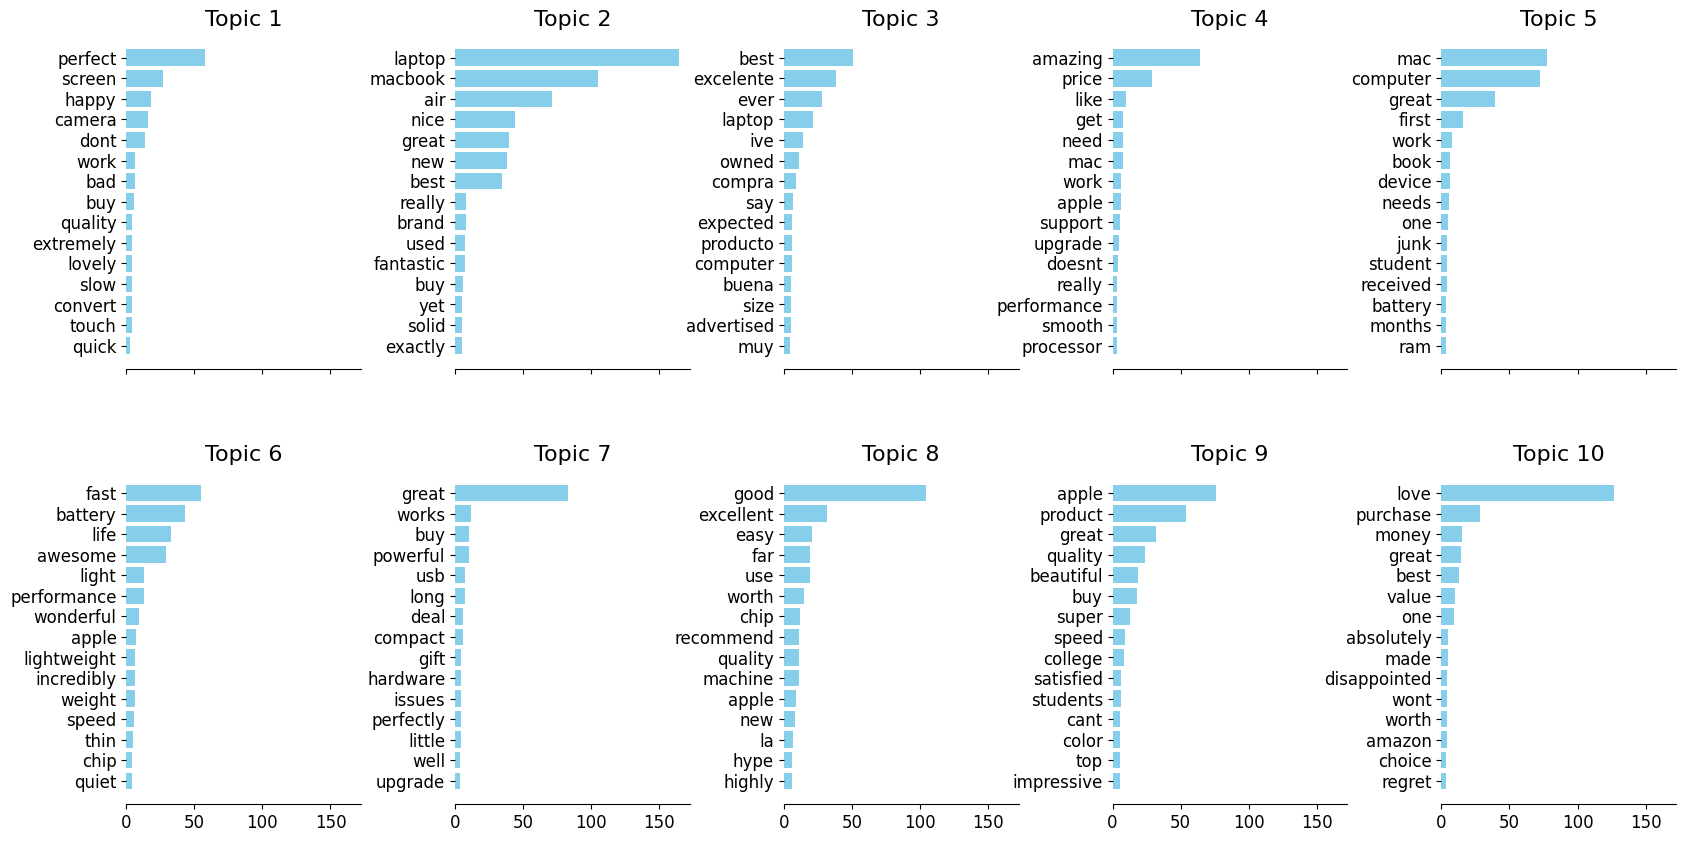

In [ ]:
# Function to plot the top words for each topic
def plot_top_words(lda_model, feature_names, n_top_words):
    fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(20, 10), sharex=True)
    axes = axes.flatten()
    for topic_idx, topic in enumerate(lda_model.components_):
        top_words_idx = topic.argsort()[:-n_top_words-1:-1]
        top_words_vals = topic[top_words_idx]
        top_words = [feature_names[i] for i in top_words_idx]
        ax = axes[topic_idx]
        ax.barh(top_words, top_words_vals, align='center', color='skyblue')
        ax.set_title(f"Topic {topic_idx + 1}", fontsize=16)
        ax.invert_yaxis()
        ax.tick_params(axis='both', which='major', labelsize=12)
        for i in 'top right left'.split():
            ax.spines[i].set_visible(False)
        fig.subplots_adjust(wspace=0.4, hspace=0.3)
    plt.show()

# Plot the top words for each topic
plot_top_words(lda, vectorizer.get_feature_names_out(), 15)


#**ASPECT BASED ANALYSIS**

In [ ]:
pip install optuna transformers

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 380.1/380.1 kB 6.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.4/233.4 kB 8.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.6/78.6 kB 5.9 MB/s eta 0:00:00


In [ ]:
import nltk
nltk.download('averaged_perceptron_tagger')


[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


True

In [ ]:
import nltk
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


True

In [ ]:
from nltk import pos_tag
from nltk.sentiment import SentimentIntensityAnalyzer
from collections import Counter

# Initialize the Sentiment Intensity Analyzer
sia = SentimentIntensityAnalyzer()

from nltk.corpus import stopwords

# Function to extract meaningful aspects from the title
def extract_aspects_from_title(title):
    # Tokenize the title
    tokens = word_tokenize(title)
    # Filter out stopwords
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word.lower() not in stop_words]
    # Tag tokens with parts of speech
    tagged_tokens = pos_tag(tokens)
    # Extract nouns and noun phrases
    aspects = [word for word, pos in tagged_tokens if pos.startswith('NN')]
    return aspects

# Apply aspect extraction to the 'title' column
df['aspects_from_title'] = df['title_after_cleaning'].apply(extract_aspects_from_title)


In [ ]:
aspect_title_df = df[['title_after_cleaning', 'aspects_from_title']]

# Display the DataFrame
print(aspect_title_df)

                      title_after_cleaning            aspects_from_title
0     great battery life great performance  [battery, life, performance]
1              lightweight good speed gold                 [speed, gold]
2         great notebook almost weaknesses        [notebook, weaknesses]
3                  best device work travel        [device, work, travel]
4                    finally able move mac                   [move, mac]
...                                    ...                           ...
1695            grandma wants grandma gets                     [grandma]
1696                               amazing                            []
1697                                 loved                            []
1698               beautiful mac book ever                   [mac, book]
1699                     really impressive                            []

[1700 rows x 2 columns]


#**ASPECT BASED FREQUENCY ANALYSIS**

In [ ]:

# Aspect Frequency Analysis
from collections import Counter

# Flatten the list of aspects from all titles
all_aspects = [aspect for aspects in df['aspects_from_title'] for aspect in aspects]

# Count the frequency of each aspect
aspect_counts = Counter(all_aspects)

# Sort the aspects by frequency
sorted_aspects = sorted(aspect_counts.items(), key=lambda x: x[1], reverse=True)

# Print the most common aspects and their frequencies
print("Top Aspects by Frequency:")
for aspect, count in sorted_aspects[:10]:
    print(f"{aspect}: {count}")

Top Aspects by Frequency:
macbook: 103
laptop: 99
apple: 98
love: 92
mac: 78
computer: 78
air: 71
product: 54
battery: 46
quality: 39


In [ ]:
from collections import Counter
# Define a mapping of synonyms or related words
aspect_mapping = {
    'battery': ['battery', 'power', 'charge', 'life'],
    'performance': ['performance', 'speed', 'efficiency','work'],
    'weight': ['weight', 'lightweight', 'portability'],
    'macbook': ['computer', 'laptop', 'air', 'product', 'apple', 'mac','machine'],
    'love': ['perfect', 'excellent','use','excelente'],
    'purchase':['price','buy']
}
# Function to map aspect to its category
def map_aspect_to_category(aspect):
    for category, words in aspect_mapping.items():
        if aspect in words:
            return category
    return aspect

# Flatten the list of aspects from all titles and map them to categories
all_aspects = [map_aspect_to_category(aspect) for aspects in df['aspects_from_title'] for aspect in aspects]

# Count the frequency of each aspect category
aspect_counts = Counter(all_aspects)

# Print the most common aspect categories and their frequencies
print("Top Aspect Categories by Frequency:")
for aspect_category, count in aspect_counts.most_common(10):
    print(f"{aspect_category}: {count}")


Top Aspect Categories by Frequency:
macbook: 597
love: 183
battery: 84
purchase: 81
performance: 54
quality: 39
screen: 21
chip: 18
value: 16
camera: 16


#**ASPECT BASED SENTIMENT ANALYSIS**

In [ ]:
def get_aspect_sentiment(aspect):
    sentiment_scores = [sia.polarity_scores(title)['compound'] for title in df[df['aspects_from_title'].apply(lambda x: aspect in x)]['title_after_cleaning']]
    average_sentiment = sum(sentiment_scores) / len(sentiment_scores) if sentiment_scores else 0
    return average_sentiment

In [ ]:
# Calculate sentiment scores for each aspect
aspect_sentiments = {aspect: get_aspect_sentiment(aspect) for aspect in aspect_counts.keys()}

# Print the sentiment scores for each aspect
print("\nSentiment Analysis for Each Aspect:")
for aspect, sentiment in aspect_sentiments.items():
    print(f"{aspect}: {sentiment}")


Sentiment Analysis for Each Aspect:
battery: 0.2894521739130435
performance: 0.39848125
gold: 0.0734
notebook: 0.5901400000000001
weaknesses: 0.4391
device: 0.40775000000000006
travel: 0.6369
move: 0.0
macbook: 0.2817922330097088
love: 0.6497088888888879
disappointing: 0.25
windows: 0.1466666666666667
lowcost: 0.4404
workstation: 0.4404
beauty: 0.5859
yes: 0.4019
amazon: 0.31805555555555554
creators: 0.6249
quality: 0.23063589743589752
lightness: 0.6369
wonderful: 0.5324857142857142
thing: 0.2312833333333333
didnt: -0.13775
compra: 0.0
buena: 0.0
precio: 0.0
razonable: 0.0
book: 0.17125714285714286
sims: 0.27115
runs: 0.5423
dream: 0.45940000000000003
needs: 0.19476
upgrade: 0.30553749999999996
budget: 0.5942333333333334
purchase: 0.3960785714285714
works: 0.5488666666666667
darkside: 0.0
brand: 0.3138375
cyber: 0.5859
deal: 0.46657499999999996
money: 0.41584666666666664
review: 0.06291428571428571
days: -0.1589
ive: 0.6368999999999999
genial: 0.4215
pc: 0.21230000000000002
guy: 0.0
s

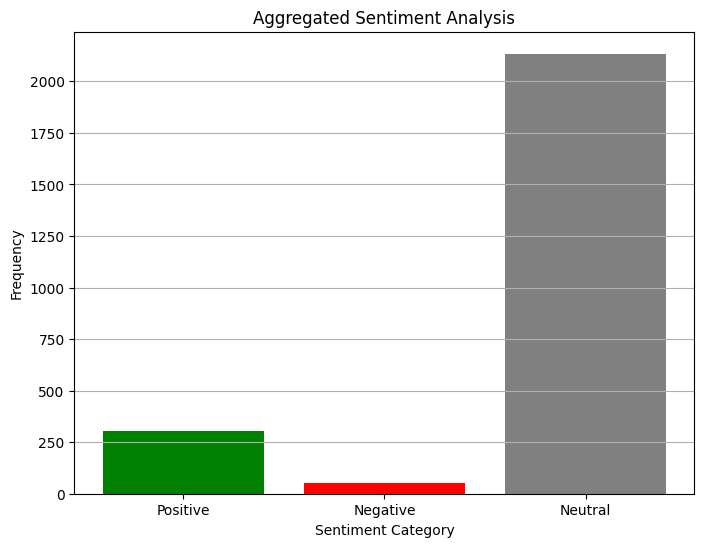

In [ ]:
import matplotlib.pyplot as plt

# Define counters for sentiment categories
positive_count = 0
negative_count = 0
neutral_count = 0

# Iterate through sentiment scores and categorize them
for sentiment_list in sentiments:
    for sentiment in sentiment_list:
        if sentiment > 0:
            positive_count += 1
        elif sentiment < 0:
            negative_count += 1
        else:
            neutral_count += 1

# Plotting the aggregated sentiment scores
plt.figure(figsize=(8, 6))
plt.bar(['Positive', 'Negative', 'Neutral'], [positive_count, negative_count, neutral_count], color=['green', 'red', 'gray'])
plt.xlabel('Sentiment Category')
plt.ylabel('Frequency')
plt.title('Aggregated Sentiment Analysis')
plt.grid(axis='y')
plt.show()
